# Data Analysis: pandas

- **Prerequisites**:
  - None/basic usage


- **Objectives:**
  - Get general overview
  - Learn about split-apply-combine, timeseries, modern/new features
  - Enjoy the merrits of high-level data structures

## What is pandas?

<img src="./images/pandas-logo.png" alt="pandas" width="300.px">

[pandas](http://pandas.pydata.org/]):
> **pandas** is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

> A few things pandas does well:
- Easy handling of missing data
- Size mutability
- Automatic and explicit data alignment
- Powerful, flexible group by functionality to perform split-apply-combine operations
- Time series-specific functionality
- Robust IO tools
- Flexibel/intuitive merging, joining, reshaping, pivoting
- Data conversion
- Intelligent label-based slicing, fancy indexing, and subsetting

### What is the difference wrt NumPy and other libraries?
- pandas builds on top of NumPy
- NumPy targets low level array operations, pandas targets data analysis specific tasks
- np.array is plain numbers, pd.DataFrame provides context
- pandas (derives from "panel data") is particularily well suited for tabular data of any kind
- pandas is a central pillar of the [PyData](http://pydata.org/) ecosystem
- pandas is **fast** due to many low-level algoritmic bits being optimized using *Cython*. Nevertheless, generalization usually sacrifices performance.
- pandas is a data analysis and manipulation tool, it is not a statistical modeling tool (statsmodels and scikit-learn are).

Let's take a look...

### Introductory Example

**Goal:**

We want to quickly explore a wage data set using
- [pandas](http://pandas.pydata.org/) and
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) (hence [matplotlib](http://matplotlib.org/)).

**Questions:**
- How does *wage* depend on *age*?
- How does *wage* dependon *education*?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('./data/wage.csv', index_col=0)

In [3]:
df.head(3)

year  age      sex            maritl      race        education  \
231655  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
86582   2004   24  1. Male  1. Never Married  1. White  4. College Grad   
161300  2003   45  1. Male        2. Married  1. White  3. Some College   

                    region        jobclass          health health_ins  \
231655  2. Middle Atlantic   1. Industrial       1. <=Good      2. No   
86582   2. Middle Atlantic  2. Information  2. >=Very Good      2. No   
161300  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes   

         logwage        wage  
231655  4.318063   75.043154  
86582   4.255273   70.476020  
161300  4.875061  130.982177

In [4]:
df.columns

Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

#### wage ~ age

In [5]:
df[['wage', 'age']].describe()

wage          age
count  3000.000000  3000.000000
mean    111.703608    42.414667
std      41.728595    11.542406
min      20.085537    18.000000
25%      85.383940    33.750000
50%     104.921507    42.000000
75%     128.680488    51.000000
max     318.342430    80.000000

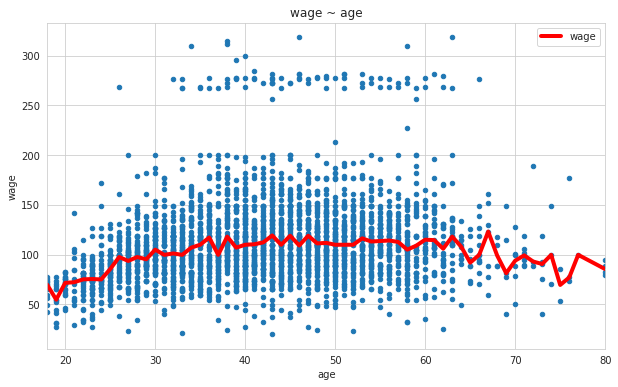

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x='age', y='wage', title='wage ~ age', ax=ax)
median_wage = df.groupby('age')[['wage']].agg(np.median)
median_wage.plot.line(label='median', linewidth=4, color='r', ax=ax)
ax.legend()

#### wage ~ education

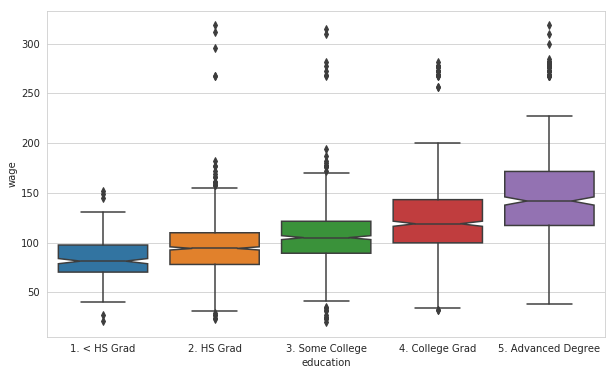

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', data=df, 
            order=sorted(df['education'].unique()), 
            notch=True,
            ax=ax)

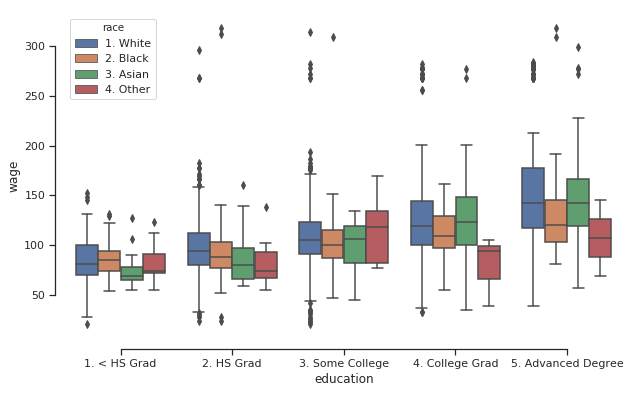

In [8]:
# what about race?
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', hue='race',
            data=df, 
            order=sorted(df['education'].unique()), 
            hue_order=sorted(df['race'].unique()), 
            ax=ax)
sns.despine(offset=10, trim=True)

In [9]:
# export to Excel for later discussion...
df_res = df.groupby(['education', 'race'])[['wage']].agg(np.median)
df_res.to_excel('data/great_insight.xlsx')
df_res

wage
education          race                
1. < HS Grad       1. White   81.283253
                   2. Black   85.383940
                   3. Asian   68.748088
                   4. Other   73.775743
2. HS Grad         1. White   94.072715
                   2. Black   87.981033
                   3. Asian   79.854900
                   4. Other   73.775743
3. Some College    1. White  104.921507
                   2. Black   99.689464
                   3. Asian  105.903197
                   4. Other  118.015588
4. College Grad    1. White  118.884359
                   2. Black  109.354256
                   3. Asian  123.089700
                   4. Other   94.072715
5. Advanced Degree 1. White  141.775172
                   2. Black  119.740851
                   3. Asian  141.775172
                   4. Other  106.945844

#### Conclusion wrt pandas
- pandas allows expressive/intuitive statements
- pandas supports easy IO operations
- pd.DataFrame is a high-level data container
- pd.DataFrame provides both data as well as tools to work with the data
- seaborn is a pandas-aware plotting library

We needed very few lines of code to take a look into our data set.

## Quick Intro

- pandas is huge
- We only cover selected aspects/areas to work on examples later on
- Please ask or see the [docs](http://pandas.pydata.org/pandas-docs/stable/) (in particular for IO capabilities) if you miss something

### Object Creation

In [10]:
# pd.Series is the basic 1d data type
s = pd.Series([10, 30, 20])
s

0    10
1    30
2    20
dtype: int64

In [11]:
# data is stored in NumPy arrays
s.values

array([10, 30, 20])

In [12]:
# there is an index
s.index

RangeIndex(start=0, stop=3, step=1)

In [13]:
# pd.DataFrame is a collection of pd.Series
df = pd.DataFrame({'strings': ['a', 'b', 'c', 'd'], 
                   'ints': [0, 1, 2, 3], 
                   'floats': np.random.randn(4), 
                   'categoricals': pd.Categorical(['good', 'bad', 'good', 'very good']), 
                   'dates': pd.date_range('2019-11-28', periods=4)})
df

strings  ints    floats categoricals      dates
0       a     0  0.455465         good 2019-11-28
1       b     1 -0.103479          bad 2019-11-29
2       c     2  0.242291         good 2019-11-30
3       d     3  1.408164    very good 2019-12-01

In [14]:
# dtype can be different for each column
df.dtypes

strings                 object
ints                     int64
floats                 float64
categoricals          category
dates           datetime64[ns]
dtype: object

In [15]:
# a DataFrame is like a dict oft Series
s = df['strings']
s

0    a
1    b
2    c
3    d
Name: strings, dtype: object

In [16]:
type(s)

pandas.core.series.Series

In [17]:
# values are again stored in a NumPy array
df.values

array([['a', 0, 0.4554646382170198, 'good',
        Timestamp('2019-11-28 00:00:00')],
       ['b', 1, -0.10347896555893066, 'bad',
        Timestamp('2019-11-29 00:00:00')],
       ['c', 2, 0.24229066963732782, 'good',
        Timestamp('2019-11-30 00:00:00')],
       ['d', 3, 1.4081641148548347, 'very good',
        Timestamp('2019-12-01 00:00:00')]], dtype=object)

### Viewing and Selecting/Setting Data

In [18]:
# display only first 3 rows
df.head(3)

strings  ints    floats categoricals      dates
0       a     0  0.455465         good 2019-11-28
1       b     1 -0.103479          bad 2019-11-29
2       c     2  0.242291         good 2019-11-30

In [19]:
# display index
df.index

RangeIndex(start=0, stop=4, step=1)

In [20]:
# display columns
df.columns  # note that this is an index-type as well

Index(['strings', 'ints', 'floats', 'categoricals', 'dates'], dtype='object')

In [21]:
# sort by an axis
df.sort_index(axis=1, ascending=False)

strings  ints    floats      dates categoricals
0       a     0  0.455465 2019-11-28         good
1       b     1 -0.103479 2019-11-29          bad
2       c     2  0.242291 2019-11-30         good
3       d     3  1.408164 2019-12-01    very good

In [22]:
# sort by values
df.sort_values(by='ints', ascending=False)

strings  ints    floats categoricals      dates
3       d     3  1.408164    very good 2019-12-01
2       c     2  0.242291         good 2019-11-30
1       b     1 -0.103479          bad 2019-11-29
0       a     0  0.455465         good 2019-11-28

In [23]:
# select by subset
df[['ints', 'floats']]

ints    floats
0     0  0.455465
1     1 -0.103479
2     2  0.242291
3     3  1.408164

In [24]:
# select by integer location
df.iloc[1:3, 1:3]

ints    floats
1     1 -0.103479
2     2  0.242291

In [25]:
# select by label
df.loc[[1, 3], ['strings', 'dates']]

strings      dates
1       b 2019-11-29
3       d 2019-12-01

In [26]:
# select by mask
df[['dates']][df['ints'] < 2]

dates
0 2019-11-28
1 2019-11-29

In [27]:
# select by both a mask and a list of columns
df.ix[df['ints'] < 2, ['dates', 'ints']]

dates  ints
0 2019-11-28     0
1 2019-11-29     1

In [28]:
# add a new column
df['new_column'] = df['ints'] * 100
df

strings  ints    floats categoricals      dates  new_column
0       a     0  0.455465         good 2019-11-28           0
1       b     1 -0.103479          bad 2019-11-29         100
2       c     2  0.242291         good 2019-11-30         200
3       d     3  1.408164    very good 2019-12-01         300

In [29]:
# behaves like an array
df['ints + new_column'] = df['ints'] + df['new_column']
df

strings  ints    floats categoricals      dates  new_column  \
0       a     0  0.455465         good 2019-11-28           0   
1       b     1 -0.103479          bad 2019-11-29         100   
2       c     2  0.242291         good 2019-11-30         200   
3       d     3  1.408164    very good 2019-12-01         300   

   ints + new_column  
0                  0  
1                101  
2                202  
3                303

In [30]:
df['new_colum_and_string'] = df['new_column'].apply(str) + ' ' + df['strings']
df

strings  ints    floats categoricals      dates  new_column  \
0       a     0  0.455465         good 2019-11-28           0   
1       b     1 -0.103479          bad 2019-11-29         100   
2       c     2  0.242291         good 2019-11-30         200   
3       d     3  1.408164    very good 2019-12-01         300   

   ints + new_column new_colum_and_string  
0                  0                  0 a  
1                101                100 b  
2                202                200 c  
3                303                300 d

In [31]:
# set a variable as new index
df_new = df.set_index('dates', drop=False)[['categoricals', 'ints']]
df_new

categoricals  ints
dates                        
2019-11-28         good     0
2019-11-29          bad     1
2019-11-30         good     2
2019-12-01    very good     3

In [32]:
# to demonstrate
df_new.loc['2019-11-27':'2019-11-28']

categoricals  ints
dates                        
2019-11-28         good     0

In [33]:
# this is rather intelligent
df_new.loc['2019']

categoricals  ints
dates                        
2019-11-28         good     0
2019-11-29          bad     1
2019-11-30         good     2
2019-12-01    very good     3

### Selected Properties/Features

In [34]:
# automatic alignmet
df1 = pd.DataFrame({'a': {0: 1, 1: 2}})
df2 = pd.DataFrame({'a': {1: 2, 3: 3}})

print(df1, df2, df1 + df2, sep='\n')

   a
0  1
1  2
   a
1  2
3  3
     a
0  NaN
1  4.0
3  NaN


In [35]:
# of course on both axis
df1 = pd.DataFrame({'a': {0: 1, 1: 2}})
df2 = pd.DataFrame({'b': {1: 2, 3: 3}})

print(df1, df2, df1 + df2, sep='\n')

   a
0  1
1  2
   b
1  2
3  3
    a   b
0 NaN NaN
1 NaN NaN
3 NaN NaN


In [36]:
# easy concatenation, as well automatically aligned on index
df = pd.concat([df1, df2], axis=1)
df

a    b
0  1.0  NaN
1  2.0  2.0
3  NaN  3.0

In [37]:
# drop where we have missing values
df.dropna()

a    b
1  2.0  2.0

In [38]:
# but only in a subset
df.dropna(subset=['b'])

a    b
1  2.0  2.0
3  NaN  3.0

In [39]:
# replace missing by forward and backward filling/padding
# a limit can also be specified
df.fillna(method='ffill').fillna(method='bfill')

a    b
0  1.0  2.0
1  2.0  2.0
3  2.0  3.0

#### Merging

Objective: combine data

- merge, join: data base style
- concatenate: array style

See also the respective section in the [docs](http://pandas.pydata.org/pandas-docs/stable/merging.html)


Let's take look...

In [40]:
# merge (join) different dataframes on indexes or keys
df_left = pd.DataFrame({'x': [10, 20, 30], 'key': ['a', 'b', 'c']})
df_right = pd.DataFrame({'y': [100, 200, 300], 'key': ['a', 'b', 'd']})

print(df_left, df_right, sep='\n')

    x key
0  10   a
1  20   b
2  30   c
     y key
0  100   a
1  200   b
2  300   d


In [41]:
# merge on with defaults, i.e. 'inner' join and no index specified, hence on column intersection 'key'
pd.merge(df_left, df_right)

x key    y
0  10   a  100
1  20   b  200

In [42]:
# .merge() available as method as well
df_left.merge(df_right, on='key')

x key    y
0  10   a  100
1  20   b  200

In [43]:
# merge on index
# note that columns overlap - therefore a subfix is added automatically
df_left.merge(df_right, left_index=True, right_index=True)

x key_x    y key_y
0  10     a  100     a
1  20     b  200     b
2  30     c  300     d

In [44]:
# outer merge on key
df_left.merge(df_right, how='outer', on='key')

x key      y
0  10.0   a  100.0
1  20.0   b  200.0
2  30.0   c    NaN
3   NaN   d  300.0

In [45]:
# say we only what to update/impute/fill missing values
# we can use .update() for that
df_incomplete = pd.DataFrame({'data': [1, 2, np.NaN, 4]})
df_backup = pd.DataFrame({'data': [10, 20, 30, 40]})

df_incomplete.update(df_backup, overwrite=False)
df_incomplete

data
0   1.0
1   2.0
2  30.0
3   4.0

In [46]:
# concatenation (array style merging)
df1 = pd.DataFrame({'a': {0: 1, 1: 2}})
df2 = pd.DataFrame({'b': {1: 2, 3: 3}})

pd.concat([df1, df2])

a    b
0  1.0  NaN
1  2.0  NaN
1  NaN  2.0
3  NaN  3.0

#### Reshaping

Objective: bringing data into the correct form

[Hadley Wickham](https://www.jstatsoft.org/article/view/v059i10)
> **Tidy Data**: A huge amount of effort is spent cleaning data to get it ready for analysis [...]. Tidy datasets are easy to manipulate, model and visualize, and have a specific structure: each variable is a column, each observation is a row, and each type of observational unit is a table.

See also the respective section in the [docs](http://pandas.pydata.org/pandas-docs/stable/reshaping.html).

One typically differentiates between:
- stacked, record or long format
- unstacked, wide format

Let's take look...

In [47]:
# record/long format, e.g. like the output of a log file
df_record = pd.DataFrame({'time': [1.0, 1.1, 2.1, 2.0, 3.1],  # "time"
                          'data': [1, 10, 20, 2, 30],
                          'device': ['a', 'b', 'b', 'a', 'b']})
df_record

time  data device
0   1.0     1      a
1   1.1    10      b
2   2.1    20      b
3   2.0     2      a
4   3.1    30      b

In [48]:
# assume we want to treat a and b as time series, we need another format
df_record['time'] = np.floor(df_record['time'])
# pivot data be redefining index and colums
df_record.pivot(index='time', columns='device', values='data')

device    a     b
time             
1.0     1.0  10.0
2.0     2.0  20.0
3.0     NaN  30.0

In [49]:
# alternatively: set indexes and then unstack
df_record.set_index(['time', 'device']).unstack()  # note that columns are now a multiindex

data      
device    a     b
time             
1.0     1.0  10.0
2.0     2.0  20.0
3.0     NaN  30.0

In [50]:
# assume data is in wide format
df_wide = pd.DataFrame({'groupA': np.sin(np.arange(4)),
                        'groupB': np.cos(np.arange(4)),
                       })
df_wide

groupA    groupB
0  0.000000  1.000000
1  0.841471  0.540302
2  0.909297 -0.416147
3  0.141120 -0.989992

In [51]:
# and we need, e.g. for groupby-operations long format
pd.melt(df_wide, value_vars=['groupA', 'groupB'], var_name='group', value_name='value')

group     value
0  groupA  0.000000
1  groupA  0.841471
2  groupA  0.909297
3  groupA  0.141120
4  groupB  1.000000
5  groupB  0.540302
6  groupB -0.416147
7  groupB -0.989992

In [52]:
# similarily, we can unstack but then have to provide names
df_wide.unstack().reset_index().rename(columns={'level_0': 'group', 'level_1': 'index', 0: 'value'})

group  index     value
0  groupA      0  0.000000
1  groupA      1  0.841471
2  groupA      2  0.909297
3  groupA      3  0.141120
4  groupB      0  1.000000
5  groupB      1  0.540302
6  groupB      2 -0.416147
7  groupB      3 -0.989992

#### Groupy By: split-apply-combine

split-apply-combine refers to:
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

**Applying** can be:
- **Aggregation:** compute summary statistics about each group, e.g. mean, size, sum, ...; this reduces the data
- **Transformation:** perform group specific operation, e.g. standardize, impute, ...; size of data remains the same
- **Filtration:** discard/keep certaing groups; this reduces the groupby-blocks
- A combination

See also the respective section in the [docs](http://pandas.pydata.org/pandas-docs/stable/groupby.html).

Grouping is based on column values and therefore requires some kind of long format.


Let's take a look...

In [53]:
df = pd.DataFrame({'group_variable': ['a', 'b', 'a', 'b', 'a', 'b'],
                   'data_variable_1': [10, 20, 30, 40, 50, 60], 
                   'data_variable_2': [-1, np.NaN, -3, -4, -5, -6]})
df

group_variable  data_variable_1  data_variable_2
0              a               10             -1.0
1              b               20              NaN
2              a               30             -3.0
3              b               40             -4.0
4              a               50             -5.0
5              b               60             -6.0

In [54]:
# .groupby() results in a GroupBy object
df_gb = df.groupby('group_variable')
df_gb

In [55]:
# whose groups can be explored
df_gb.groups

{'a': Int64Index([0, 2, 4], dtype='int64'),
 'b': Int64Index([1, 3, 5], dtype='int64')}

In [56]:
# and which is iterable
for i, (group, df_group) in enumerate(df_gb):
    print(i, group, df_group, sep='\n', end='\n\n')

0
a
  group_variable  data_variable_1  data_variable_2
0              a               10             -1.0
2              a               30             -3.0
4              a               50             -5.0

1
b
  group_variable  data_variable_1  data_variable_2
1              b               20              NaN
3              b               40             -4.0
5              b               60             -6.0



In [57]:
# but most importantly, there are a few interesting methods
# let's aggregate
df_gb[['data_variable_1', 'data_variable_2']].mean()

data_variable_1  data_variable_2
group_variable                                  
a                            30             -3.0
b                            40             -5.0

In [58]:
# provide a custom aggregation function
df_gb[['data_variable_1', 'data_variable_2']].agg({'my_mean': np.mean, 'my_std': np.std})

my_mean                          my_std                
               data_variable_1 data_variable_2 data_variable_1 data_variable_2
group_variable                                                                
a                           30            -3.0            20.0        2.000000
b                           40            -5.0            20.0        1.414214

In [59]:
# not selecting any column results in applying the function to all columns
df_gb.mean()

data_variable_1  data_variable_2
group_variable                                  
a                            30             -3.0
b                            40             -5.0

In [60]:
# let's transform
# here: subtract mean
# the function in transform needs to return the same shape as the input
def substract_mean(x):
    return x - x.mean()

df['data_variable_1_transformed'] = df_gb[['data_variable_1']].transform(substract_mean)
df[['group_variable', 'data_variable_1', 'data_variable_1_transformed']]

group_variable  data_variable_1  data_variable_1_transformed
0              a               10                        -20.0
1              b               20                        -20.0
2              a               30                          0.0
3              b               40                          0.0
4              a               50                         20.0
5              b               60                         20.0

In [61]:
# use transform to fill missing values with group statistics
def fill_mean(x):
    x[x.isnull()] = np.nanmean(x)
    return x

df['data_variable_2_fixed'] = df_gb['data_variable_2'].transform(fill_mean)
df[['group_variable', 'data_variable_2', 'data_variable_2_fixed']]

group_variable  data_variable_2  data_variable_2_fixed
0              a             -1.0                   -1.0
1              b              NaN                   -5.0
2              a             -3.0                   -3.0
3              b             -4.0                   -4.0
4              a             -5.0                   -5.0
5              b             -6.0                   -6.0

In [62]:
# let's filter
# here: drop groups where we have any NaN
# the function in transform needs to return a boolean
df_gb.filter(lambda x: ~x.isnull().any().any())

group_variable  data_variable_1  data_variable_2  \
0              a               10             -1.0   
2              a               30             -3.0   
4              a               50             -5.0   

   data_variable_1_transformed  data_variable_2_fixed  
0                        -20.0                   -1.0  
2                          0.0                   -3.0  
4                         20.0                   -5.0

**Remarks:**
- Note that `.agg()`,  `.transform()`,  `.filter()` are special cases of `.apply()`. Use the latter for situations that do not match either of the others.
- Since pandas 0.17:
  > We are **releasing the global-interpreter-lock (GIL) on some cython operations**. This will allow other threads to run simultaneously during computation, potentially allowing performance improvements from **multi-threading**. Notably **groupby**, nsmallest, value_counts and some indexing operations benefit from this.

#### Time Series / Date Functionality

pandas provides both feature richt data types (based on NumPy datetime and timedelta), to represent time as well as functionality to manipulate time series data.

Tools are provided to:
- generate sequences of fixed-frequency date and time spans
- compute relative dates
- resample, i.e. conform time series to a particular frequency

See also the respective section in the [docs](http://pandas.pydata.org/pandas-docs/stable/timeseries.html).


Let's take a look...

In [63]:
# let's create a DatetimeIndex
time_range = pd.date_range('2019-11-28', '2019-11-30', freq='1d')
time_range

DatetimeIndex(['2019-11-28', '2019-11-29', '2019-11-30'], dtype='datetime64[ns]', freq='D')

In [64]:
# a DatetimeIndex knows quite a bit about itself
print(time_range.year, time_range.month, time_range.weekday, sep='\n')

Int64Index([2019, 2019, 2019], dtype='int64')
Int64Index([11, 11, 11], dtype='int64')
Int64Index([3, 4, 5], dtype='int64')


In [65]:
# let's create a new DatetimeIndex with a higher frequency
time_range = pd.date_range('2019-11-28 09:00', '2019-11-28 17:00', freq='30min')
time_range

DatetimeIndex(['2019-11-28 09:00:00', '2019-11-28 09:30:00',
               '2019-11-28 10:00:00', '2019-11-28 10:30:00',
               '2019-11-28 11:00:00', '2019-11-28 11:30:00',
               '2019-11-28 12:00:00', '2019-11-28 12:30:00',
               '2019-11-28 13:00:00', '2019-11-28 13:30:00',
               '2019-11-28 14:00:00', '2019-11-28 14:30:00',
               '2019-11-28 15:00:00', '2019-11-28 15:30:00',
               '2019-11-28 16:00:00', '2019-11-28 16:30:00',
               '2019-11-28 17:00:00'],
              dtype='datetime64[ns]', freq='30T')

In [66]:
# there are also interesting methods like this
# see how we can use this to aggregate e.g. hour-wise?
time_range.floor(freq='60min')

DatetimeIndex(['2019-11-28 09:00:00', '2019-11-28 09:00:00',
               '2019-11-28 10:00:00', '2019-11-28 10:00:00',
               '2019-11-28 11:00:00', '2019-11-28 11:00:00',
               '2019-11-28 12:00:00', '2019-11-28 12:00:00',
               '2019-11-28 13:00:00', '2019-11-28 13:00:00',
               '2019-11-28 14:00:00', '2019-11-28 14:00:00',
               '2019-11-28 15:00:00', '2019-11-28 15:00:00',
               '2019-11-28 16:00:00', '2019-11-28 16:00:00',
               '2019-11-28 17:00:00'],
              dtype='datetime64[ns]', freq=None)

In [67]:
# if needed, you can always go back to ns since 1970-01-01
time_range.astype(np.int)

Int64Index([1574931600000000000, 1574933400000000000, 1574935200000000000,
            1574937000000000000, 1574938800000000000, 1574940600000000000,
            1574942400000000000, 1574944200000000000, 1574946000000000000,
            1574947800000000000, 1574949600000000000, 1574951400000000000,
            1574953200000000000, 1574955000000000000, 1574956800000000000,
            1574958600000000000, 1574960400000000000],
           dtype='int64')

In [68]:
# this is where time starts
print(pd.Timestamp(0))
# but that does not mean we cannot go back to 1969
print(pd.Timestamp('1969'))

1970-01-01 00:00:00
1969-01-01 00:00:00


In [69]:
# an irregular time index
time = pd.DatetimeIndex(['2019-11-28 09:00', '2019-11-28 09:14', '2019-11-28 09:56', 
                         '2019-11-28 10:05',
                         '2019-11-28 11:30',])
# and data that we sample (after) every full hour
data = [9, 9, 9, 10, 11]

In [70]:
df = pd.DataFrame(dict(signal=data), 
                  index=time, )
df

signal
2019-11-28 09:00:00       9
2019-11-28 09:14:00       9
2019-11-28 09:56:00       9
2019-11-28 10:05:00      10
2019-11-28 11:30:00      11

In [71]:
# we want to resample to freq='1h' by computing a mean
df.resample('1h').mean()

signal
2019-11-28 09:00:00       9
2019-11-28 10:00:00      10
2019-11-28 11:00:00      11

In [72]:
# we want ot compute a rolling statistics like a moving average
# by considering 3 consecutive values
df.rolling(window=3).mean()

signal
2019-11-28 09:00:00        NaN
2019-11-28 09:14:00        NaN
2019-11-28 09:56:00   9.000000
2019-11-28 10:05:00   9.333333
2019-11-28 11:30:00  10.000000

In [73]:
# with irregular data, this does not make sense, it is more reasonable 
# to define a time-based window
df.rolling(window='15min').mean()

signal
2019-11-28 09:00:00     9.0
2019-11-28 09:14:00     9.0
2019-11-28 09:56:00     9.0
2019-11-28 10:05:00     9.5
2019-11-28 11:30:00    11.0

**Remarks:**
- If possible, use pandas time and date functionality which is very well developed.
- Although not as convenient, in particular with regards to readbility and indexing, regular data can easily be processed using NumPy. Dealing with irregularily sampled data is however difficult and pandas provides a very elegant solution to this frequently occuring situation.
- Resampling is a time-based grouping operation and in facts uses the related tools.

### Pseudorandom Picks

In [74]:
# categoricals save memory
df = pd.DataFrame({'cat': np.random.choice(['a', 'b', 'c'], 1_000_000)})

In [75]:
df['cat'] = df['cat'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 1 columns):
cat    1000000 non-null category
dtypes: category(1)
memory usage: 976.8 KB


In [76]:
# easily factorize/encode (non-)numeric data
pd.factorize(['a', 'b', 1, 1, 'a'])

(array([0, 1, 2, 2, 0]), array(['a', 'b', '1'], dtype=object))

In [77]:
# similar to factorize: .ngroup() and .cumcount() enumerates groups and their elements
df = pd.DataFrame({'catA': [1, 1, 2, 3, 2], 'catB': list('aaaba')})
df

catA catB
0     1    a
1     1    a
2     2    a
3     3    b
4     2    a

In [78]:
df['cumcount'] = df.groupby(['catA', 'catB']).cumcount()
df['ngroup'] = df.groupby(['catA', 'catB']).ngroup()
df

catA catB  cumcount  ngroup
0     1    a         0       0
1     1    a         1       0
2     2    a         0       1
3     3    b         0       2
4     2    a         1       1

In [79]:
# digitize/bin/discretize continuous data (cf. np.digitize)
pd.cut([-2, -1, 0, 1, 2], bins=[-1, 0, 1])

[NaN, NaN, (-1.0, 0.0], (0.0, 1.0], NaN]
Categories (2, interval[int64]): [(-1, 0] < (0, 1]]

In [80]:
# assign a new column
# this is particularily relevant for chaining operations
# by using assign, it is not necessary to declare an intermediate variable
df = pd.DataFrame({'a': [1, 2]})
df.assign(a_times_ten=lambda x: 10*x['a'])

a  a_times_ten
0  1           10
1  2           20

**piping**
- Inspired by R's [magrittr package](https://cran.r-project.org/web/packages/magrittr/index.html)
- Chaining requires the underlying object to support the required operation, i.e. provide the desired method. However, in general, this will not be the case.
- To apply an arbitrary function, `.pipe()` can be used

More precisely
```Python
>>> f(g(h(df), arg1=a), arg2=b, arg3=c)
```
can be expressed as
```Python
>>> (df.pipe(h)
...    .pipe(g, arg1=a)
...    .pipe(f, arg2=b, arg3=c)
... )
```

# Questions?